Feature extraction is crucial in fraud detection neural network modeling because it transforms raw data into informative, non-redundant features that enhance the model's ability to distinguish between fraudulent and legitimate activities. By highlighting patterns, relationships, and anomalies in the data, effective feature extraction improves the model's accuracy, efficiency, and ability to generalize to new, unseen fraud scenarios.

# 1. Variable Importance in Modeling
Variables, also known as features, are the fundamental building blocks of machine learning models. They represent the data that a machine learning model uses to learn patterns and make predictions. Each variable can be seen as a dimension in the dataset, contributing to the overall structure and complexity of the data. Proper handling and selection of variables are crucial for building robust, accurate, and interpretable machine learning models.

Why does variable importance matter in modeling? Understanding which variables are important, helps in several ways:

* Model Performance: By focusing on the most relevant variables, we can enhance the model's accuracy and efficiency.
* Interpretability: Identifying key variables makes the model more interpretable, allowing us to understand how it makes predictions.
* Data Collection: Knowing which variables are important can inform future data collection efforts, ensuring that we gather the most valuable information.

In practice, various techniques like feature importance ranking, correlation analysis, and domain expertise are used to determine the importance of each variable.

# 2. Feature Engineering
Feature engineering is a crucial step in the machine learning pipeline that involves creating new features or modifying existing ones to improve the performance of a machine learning model. This step is often where domain knowledge is most applied, as it involves transforming raw data into meaningful representations that better capture the underlying patterns and relationships.

Feature engineering can significantly impact the success of a machine learning project. It includes:

* Transforming Features: Applying mathematical transformations to existing variables to enhance their predictive power.
* Creating New Features: Generating new variables from existing data that better represent the underlying problem.
* Aggregating Data: Combining multiple data points into a single feature that summarizes important information.

Feature extraction is a subset of feature engineering focused on transforming raw data into a set of features that can be effectively used by a machine learning model. It aims to reduce the complexity of data while retaining its most important information. By focusing on the most relevant information, feature extraction can enhance the predictive power of machine learning models.

## 2.1. Feature Extraction: High/Low Dollar
A binary feature is an attribute that can take on only two possible values. These values often represent two distinct categories or states, such as 0 and 1. Binary features are commonly used in neural networks because they simplify the decision-making process. For example, in a dataset predecting whether a transaction is fraud or not, it can be helpful to know whether it was an online purchase or not. Anoter example is if the transcation happened during the night or in daytime. There is a sea of binary features we can create from the information we have in our dataset, but it is important that we choose smartly in the sense that it actually helps prediction with better performance.

One case is to check whether a transaction amount is of a high or low amount. It can aid the model in better prediction. For now, let us assume that we set $100 as the threshold where any transaction amount above it would be considered high dollar and anything below would be considered low dollar. Let's create this feature step-by-step:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
import sys

path = '/content/drive/MyDrive/'
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive/
/content/drive/MyDrive


In [ ]:
# Import libraries
import pandas as pd
# Read the data
df = pd.read_csv('/content/drive/MyDrive/FICO Analytics Challenge/Data/train.csv')
# Return top 5 rows of the dataframe
df.head(10)

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,...,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.83,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,40.289849,-92.676330,0,0,2020-01-01 17:12:25,1,US,Missouri,US,Iowa
1,0033864050176488B,Fritsch and Sons,health_fitness,1.89,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,40.699982,-91.713680,0,0,2020-01-01 17:47:30,1,US,Iowa,US,Iowa
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.53,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,40.295853,-92.779702,0,0,2020-01-01 17:59:01,1,US,Missouri,US,Iowa
3,0033864050176488B,Homenick LLC,personal_care,90.24,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,40.535509,-91.770945,0,0,2020-01-01 18:05:38,1,US,Missouri,US,Iowa
4,0033864050176488B,Mayert Group,shopping_pos,156.86,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,41.245006,-92.860950,0,0,2020-01-01 18:08:36,1,US,Iowa,US,Iowa
5,0033864050176488B,"Turcotte, McKenzie and Koss",entertainment,69.34,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,41.636632,-92.681896,0,0,2020-01-01 18:11:43,1,US,Iowa,US,Iowa
6,0033864050176488B,Balistreri-Nader,misc_pos,136.93,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,41.127223,-92.741835,0,0,2020-01-01 18:42:40,1,US,Iowa,US,Iowa
7,0033864050176488B,Bogisich-Homenick,misc_net,59.33,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,41.321790,-92.181081,0,0,2020-01-01 18:55:23,1,US,Iowa,US,Iowa
8,0033864050176488B,"Stroman, Hudson and Erdman",gas_transport,60.83,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,41.678246,-91.705300,0,0,2020-01-01 19:06:46,1,US,Iowa,US,Iowa
9,0033864050176488B,Romaguera Ltd,health_fitness,66.26,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,40.928615,-91.389791,0,0,2020-01-01 19:26:32,1,US,Iowa,US,Iowa


Now that we have the data in hand, let's define a function where it would return the value 1 if the input is above 100, and 0, otherwise:

In [ ]:
def highLowDollarFunction(x):
    if x >= 100:
        return 1
    else:
        return 0

Next step is to simply use this function to create a new feature called "HighLowDollar" where it specifies whether a transaction had an amount above 100 or not:

In [ ]:
df['HighLowDollar']=df['transactionAmount'].apply(highLowDollarFunction)
df.head()

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,...,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,HighLowDollar
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.83,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-92.676330,0,0,2020-01-01 17:12:25,1,US,Missouri,US,Iowa,0
1,0033864050176488B,Fritsch and Sons,health_fitness,1.89,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-91.713680,0,0,2020-01-01 17:47:30,1,US,Iowa,US,Iowa,0
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.53,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-92.779702,0,0,2020-01-01 17:59:01,1,US,Missouri,US,Iowa,0
3,0033864050176488B,Homenick LLC,personal_care,90.24,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-91.770945,0,0,2020-01-01 18:05:38,1,US,Missouri,US,Iowa,0
4,0033864050176488B,Mayert Group,shopping_pos,156.86,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-92.860950,0,0,2020-01-01 18:08:36,1,US,Iowa,US,Iowa,1


At the end of the table above, you can see the values for the new feature we created. Now think about how you can change the function we defined to create new features.

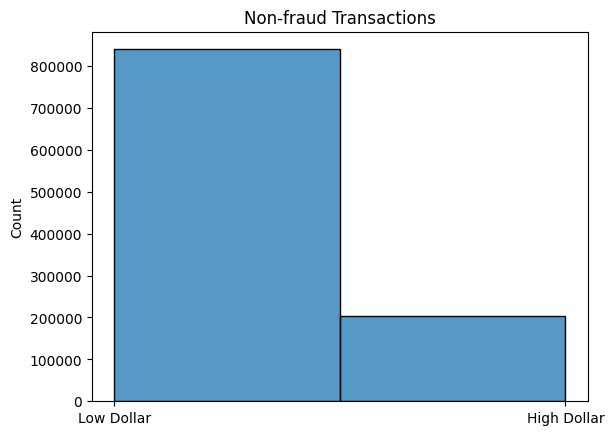

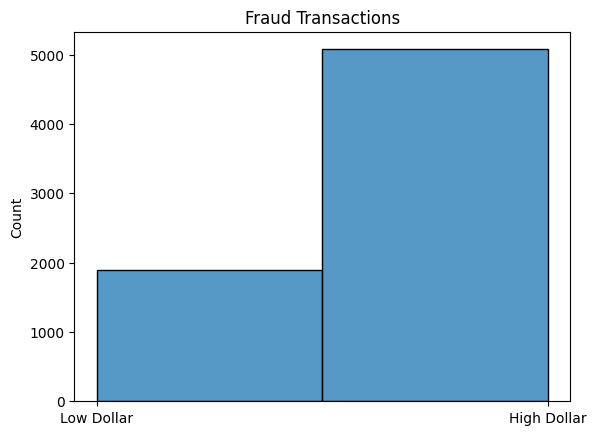

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Sort the data frame by hour of transaction
df.sort_values(by=['HighLowDollar'],inplace=True)
# Plotting the transactionHour histogram for non-fraud transactions
sns.histplot(df[df.mdlIsFraudTrx==0].HighLowDollar.values, bins=2).set(title='Non-fraud Transactions')
plt.xticks(np.arange(0, 2))
plt.xticks([0, 1], ['Low Dollar', 'High Dollar'])
plt.show()
sns.histplot(df[df.mdlIsFraudTrx==1].HighLowDollar.values, bins=2).set(title='Fraud Transactions')
plt.xticks(np.arange(0, 2))
plt.xticks([0, 1], ['Low Dollar', 'High Dollar'])
plt.show()

## 2.2. Feature Extraction: IS_0_TO_5_AM
Consider a dataset of card transactions with information about each transaction, including the exact time of the transaction. The time of the transaction can be a significant indicator of fraudulent activity.Suppose we have 1000 fraud transactions, all occurring at 02:05:34. This specific time is likely a strong predictor of fraud. However, what if a transaction occurs at 02:05:35? It's not exactly the same time, but it's very close, suggesting it might also be fraudulent. If our model only uses the exact time as input, it won't capture these near-misses. This is where feature engineering comes in. By creating new features from existing ones, we can better capture important patterns. For instance, we can create a new binary feature called "IS_0_TO_5_AM" that indicates whether a transaction occurred between midnight and 5 AM. This new feature can help our model better identify fraudulent transactions.

One might ask why we chose the 0-5 AM window. Why not noon to 6 PM or some other time frame? This is a great question, and here's the reasoning:

Understanding data and its relationship to the output is a fundamental step in data analysis and modeling. We have various tools to study data and extract meaningful insights, which help us create features that are both a good fit for our specific model and informative, thus improving prediction accuracy. In the case of transaction times, we can create a histogram of fraud transactions with 1-hour bins to identify patterns.

As seen before, the second column shows the transaction date and time. What we are interested in is that at which hour the transaction happened. This can help us see how many frauds are in say 10-11 AM, or 3-4 PM. And by looking at the results, we may get valuable information. So let's define a dummy variable that computes the hour that the transaction has happeneed:

In [ ]:
df['transactionHour']=df['transactionDateTime'].str[11:13]
df.head()

,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,...,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,transactionHour
0,0033864050176488B,"Stehr, Jewess and Schimmel",misc_net,35.83,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-92.676330,0,0,2020-01-01 17:12:25,1,US,Missouri,US,Iowa,17
1,0033864050176488B,Fritsch and Sons,health_fitness,1.89,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-91.713680,0,0,2020-01-01 17:47:30,1,US,Iowa,US,Iowa,17
2,0033864050176488B,"Tromp, Kerluke and Glover",grocery_net,18.53,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-92.779702,0,0,2020-01-01 17:59:01,1,US,Missouri,US,Iowa,17
3,0033864050176488B,Homenick LLC,personal_care,90.24,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-91.770945,0,0,2020-01-01 18:05:38,1,US,Missouri,US,Iowa,18
4,0033864050176488B,Mayert Group,shopping_pos,156.86,Meredith,Campbell,F,043 Hanson Turnpike,52563,41.1826,...,-92.860950,0,0,2020-01-01 18:08:36,1,US,Iowa,US,Iowa,18


Looking at the results, we can see that we have successfully derived the hour of the transaction. Now, let's draw the histogram for transactionHour, for fraud and non-fraud transactions:
This next step helps us understand the distribution of transaction hours, enabling us to decide on appropriate feature engineering steps to improve our model's performance.

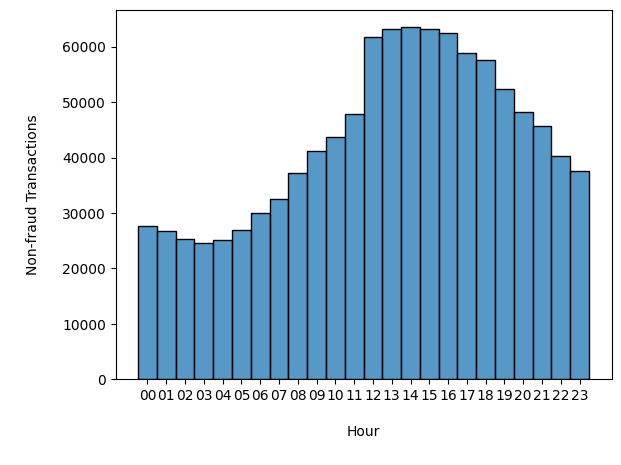

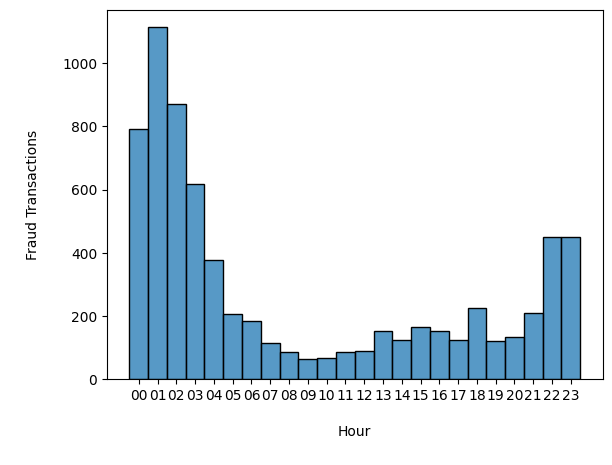

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Sort the data frame by hour of transaction
df.sort_values(by=['transactionHour'],inplace=True)
# Plotting the transactionHour histogram for non-fraud transactions
sns.histplot(df[df.mdlIsFraudTrx==0].transactionHour.values)
plt.xlabel('\nHour\n')
plt.ylabel('\nNon-fraud Transactions\n')
plt.show()
# Plotting the transactionHour histogram for fraud transactions
sns.histplot(df[df.mdlIsFraudTrx==1].transactionHour.values)
plt.xlabel('\nHour\n')
plt.ylabel('\nFraud Transactions\n')
plt.show()

What is your take from the plots above? Pause here, look closer to the distributions and try to use your intuition to explain what's happening. Of course, at nights, we can see that the number of non-fraud transactions are significantly lower than during the day. A normal person shops and uses their credit card during daytime. Now, take a look at the fraud distribution. The difference between day and night are now different. Would you say that this means anything? Does this tell us that if a transaction happens during night time, it is more probable ro be fraud? Well, you may be on the right track but we cannot conclude that YET. Let's calcualte the ratio of fraud to non-fraud transaction for each hour first:

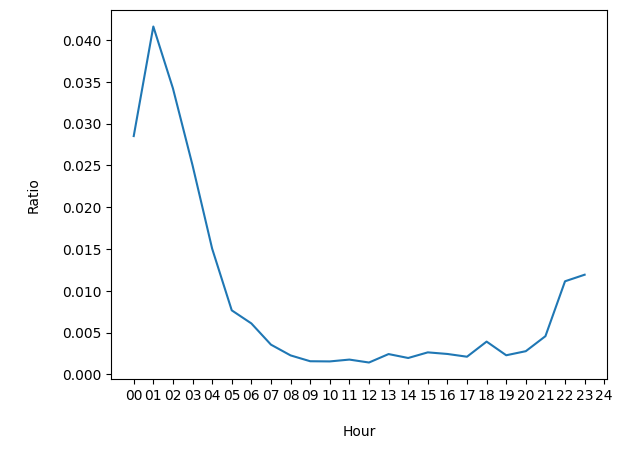

In [ ]:
nonFraudCount = df[df.mdlIsFraudTrx==0].transactionHour.value_counts().sort_index().values
fraudCount = df[df.mdlIsFraudTrx==1].transactionHour.value_counts().sort_index().values
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])
plt.plot(fraudCount/nonFraudCount)
plt.xlabel('\nHour\n')
plt.ylabel('\nRatio\n')
plt.show()

Yay! We can now say that based on observation and analyzing the transactionHour, there is a relation between a fraudulant transaction and the time of day of it happening. Therefore, by looking at the graph above, we can create a new feature called IS_10_PM_TO_4_AM which is 1 if the transaction happens between 10 PM and 4 AM, and 0, otherwise. This new feature can defintiely help us in deciding whether a transaction is fraud or not.

## 2.3. Feature Extraction: Domain Knowledge and Data-Driven

Features derived from domain knowledge or instinct are crucial for developing effective fraud/non-fraud prediction models. Fraud detection experts can identify attributes of transactions likely to indicate fraud, such as transactions from unusual locations or those significantly deviating from a user’s typical spending pattern. They might create custom metrics not directly available in the raw data, like a “suspicious activity score” based on the frequency and amount of recent transactions. Features informed by domain knowledge make models more interpretable because they are tied to known fraud indicators, making it easier to understand how the model flags potentially fraudulent transactions.

Fraud analysts often start with hypotheses about what constitutes suspicious behavior, creating features to test these hypotheses, such as sudden increases in transaction frequency or value. In addition to this, analysts often rely on their intuition, developed through experience, to identify potentially important features, recognizing patterns or anomalies not immediately obvious through statistical analysis alone. During exploratory data analysis, these intuitive insights can guide the investigation, prompting analysts to create new features for further examination.

Combining domain knowledge and instinct with data-driven methods leads to a more comprehensive feature extraction process. While automated methods can uncover patterns not easily discernible to humans, domain knowledge and intuition ensure the features are meaningful and relevant to the context of fraud detection. For instance, a security analyst might know that transactions just below a card’s limit are often fraudulent attempts to avoid triggering alerts. This insight can guide the creation of features that capture such transaction patterns, which might not be immediately apparent through data analysis alone.

In summary, features derived from domain knowledge or instinct enrich the data-driven feature extraction process by adding context-specific insights and intuitive patterns that automated methods might miss. This leads to more accurate and interpretable fraud detection models.

![alt text](https://ficorp.sharepoint.com/:i:/r/sites/FalconConsortiumModeling/Shared%20Documents/HBCU%202024-25%20FICO%20Educational%20Analytic%20Challenge/Week%2003/output.png?csf=1&web=1&e=F32o9M)

In the example below, the transaction marked as fraudulent occurred in City B, while most transactions were clustered around City A. This geographical discrepancy alone can raise suspicion because it suggests that the transaction doesn't align with the typical spending behavior observed in the dataset.

![alt text](https://ficorp.sharepoint.com/:i:/r/sites/FalconConsortiumModeling/Shared%20Documents/HBCU%202024-25%20FICO%20Educational%20Analytic%20Challenge/Week%2003/output2.png?csf=1&web=1&e=52lALj)

# 3. Exercises

1. Review: Deep dive into data analysis again. Try to understand fraud and non-fraud behaviors by looking at data from different aspects.

2. CP/CNP: Remember the analysis on card present/not present? In cases where the card was not present, fraud to non-fraud ratio was higher. What does this piece of information tell us? Probably it can help us better predict whether a transaction is fraud. What we can do is to create a feature called "is_CNP" based on the analysis in week 2, where it is 1 if the card is not present and 0, otherwise.

# 4. Challenges

1. Look through the data and try to visualize different features.
    * See if you can find patterns between features and the output.
    * Find patterns and correlations between different features.
    * Search and think about possible new features that you can extract from existing ones.
    * Use analysis on data to prove/reject hypothesises about the new features you have created.